In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit as sss
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.svm import SVC as svm
from sklearn.tree import DecisionTreeClassifier as tree


In [5]:
from sklearn.ensemble import RandomForestClassifier as random_forst
from sklearn.ensemble import AdaBoostClassifier as ada_boost
from sklearn.ensemble import GradientBoostingClassifier as grad_boost
from sklearn.linear_model import LogisticRegression as log_reg

In [6]:
import pandas as pd

In [7]:
X = pd.read_csv("modified/X_data.csv")
y = pd.read_csv("modified/y_data.csv")
test = pd.read_csv("modified/test.csv")

In [8]:
X.head()

,Unnamed: 0,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,0,1,1,1,0,1.0,1,1,1
1,1,1,0,3,4,1.0,2,0,3
2,2,3,0,2,1,0.0,1,1,2
3,3,1,0,3,4,0.0,2,0,3
4,4,3,1,3,1,0.0,1,1,1


In [9]:
X.isnull().any()

Unnamed: 0    False
Pclass        False
Sex           False
Age           False
Fare          False
Embarked      False
FamilySize    False
IsAlone       False
Title         False
dtype: bool

In [10]:
X = X.drop(['Unnamed: 0'],axis=1)

In [11]:
X.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,1,1,1,0,1.0,1,1,1
1,1,0,3,4,1.0,2,0,3
2,3,0,2,1,0.0,1,1,2
3,1,0,3,4,0.0,2,0,3
4,3,1,3,1,0.0,1,1,1


In [12]:
y.head()

,0,1
0,1,1
1,2,1
2,3,1
3,4,0
4,5,1


In [13]:
y.columns

Index(['0', '1'], dtype='object')

In [14]:
y = y.drop(['0'],axis=1)

In [15]:
y.head()

,1
0,1
1,1
2,1
3,0
4,1


In [16]:
test.head()

,Unnamed: 0,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,IsAlone
0,0,3,1,3,0.0,2,1,1,1
1,1,3,0,4,0.0,0,2,3,0
2,2,2,1,4,1.0,2,1,1,1
3,3,3,1,2,1.0,0,1,1,1
4,4,3,0,1,2.0,0,3,3,0


In [17]:
test = test.drop(['Unnamed: 0'],axis=1)

In [18]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,IsAlone
0,3,1,3,0.0,2,1,1,1
1,3,0,4,0.0,0,2,3,0
2,2,1,4,1.0,2,1,1,1
3,3,1,2,1.0,0,1,1,1
4,3,0,1,2.0,0,3,3,0


In [19]:
classifiers = [knc(3), svm(probability=True), tree(), random_forst(), ada_boost(), grad_boost(), log_reg()]

In [21]:
classifiers

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=3, p=2,
            weights='uniform'),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=True, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, 

In [22]:
log_cols = ["Classifier","Accuracy"]
log = pd.DataFrame(columns=log_cols)

In [23]:
sss

sklearn.model_selection._split.StratifiedShuffleSplit

In [24]:
samples = sss(n_splits=10, test_size=0.1,random_state=0)

In [25]:
acc_dict = {}

In [27]:
X.shape,y.shape

((891, 8), (890, 1))

In [30]:
np.asarray(X)[0,:]

array([1., 1., 1., 0., 1., 1., 1., 1.])

In [31]:
X.drop(X.index[0])

,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
1,1,0,3,4,1.0,2,0,3
2,3,0,2,1,0.0,1,1,2
3,1,0,3,4,0.0,2,0,3
4,3,1,3,1,0.0,1,1,1
5,1,1,3,0,1.0,1,1,1
6,1,1,4,4,0.0,1,1,1
7,3,1,0,2,0.0,5,0,4
8,3,0,2,2,0.0,3,0,3
9,2,0,0,3,1.0,2,0,3
10,3,0,0,2,0.0,3,0,2


In [34]:
X = X.drop(X.index[0])

In [35]:
X.shape

(890, 8)

In [86]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone',
       'Title'],
      dtype='object')

In [87]:
X = X.values
y = y.values
test = test.values

In [96]:
def fetch_data(indices):
#     if var == 'X':
    train = np.zeros((len(indices),8))
    test = np.zeros((len(indices),1))
    count = 0
#     assert X.iloc[2+1].shape[0] == 8
    for index in indices:
#         print(train[count,:].shape)
#         print(X[index,:])
#         train[count,:] = X.iloc[index+1].values
#         test[count,:] = y.iloc[1+index].values
        train[count,:] = X[index,:]
        test[count,:] = y[index,:]
        count += 1
    
    print(train.shape, test.shape)
    return train, test
#     if var == 'y':
        

In [97]:
for train_index, test_index in samples.split(X,y):
    
#     X_train, X_test = fetch_data('X',train_index, test_index)
#     y_train, y_test = fetch_data('y',train_index,test_index)
    X_train, y_train = fetch_data(train_index)
    X_test, y_test = fetch_data(test_index)
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train,y_train)
        train_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, train_pred)
        
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

(801, 8) (801, 1)
(89, 8) (89, 1)


C:\Users\ankish\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ankish\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

(801, 8) (801, 1)
(89, 8) (89, 1)


C:\Users\ankish\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ankish\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

(801, 8) (801, 1)
(89, 8) (89, 1)


C:\Users\ankish\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ankish\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

(801, 8) (801, 1)
(89, 8) (89, 1)


C:\Users\ankish\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(801, 8) (801, 1)
(89, 8) (89, 1)


C:\Users\ankish\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ankish\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

(801, 8) (801, 1)
(89, 8) (89, 1)


C:\Users\ankish\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(801, 8) (801, 1)
(89, 8) (89, 1)


C:\Users\ankish\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ankish\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

(801, 8) (801, 1)
(89, 8) (89, 1)


C:\Users\ankish\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(801, 8) (801, 1)
(89, 8) (89, 1)


C:\Users\ankish\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ankish\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

(801, 8) (801, 1)
(89, 8) (89, 1)


C:\Users\ankish\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ankish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
acc_dict

{'KNeighborsClassifier': 9.247191011235955,
 'SVC': 8.640449438202248,
 'DecisionTreeClassifier': 8.370786516853933,
 'RandomForestClassifier': 8.359550561797754,
 'AdaBoostClassifier': 8.52808988764045,
 'GradientBoostingClassifier': 8.52808988764045,
 'LogisticRegression': 8.314606741573034}

In [99]:
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf]/10.0
    log_entry = pd.DataFrame([[clf,acc_dict[clf]]],columns=log_cols)
    log = log.append(log_entry)

In [101]:
import seaborn as sns

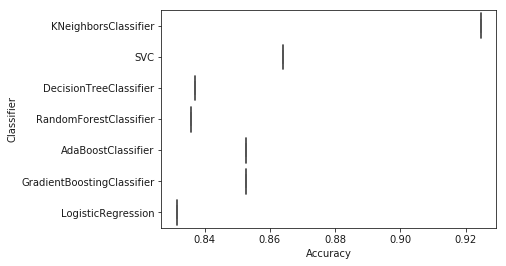

In [103]:
plt.xlabel('Accuracy')
plt.ylabel('Classifier Accuracy')

sns.set_color_codes("muted")
sns.boxplot(x='Accuracy',y='Classifier', data=log, color='b')

In [78]:
X.iloc[3].values

array([3., 1., 3., 1., 0., 1., 1., 1.])

In [39]:
for i,j in samples.split(X,y):
    print(i)
    print(j)

[348 133 486 518 225  29 128 580 102 650 130 136 209 176 808 541 406 634
 129 477 253 384 265 290 685 118 300 284 468 132 842 702 455 255 234 344
 430 444 661  67 123 447 697 604 115 843 299 701 105 613 774  26  59 428
 409  76 124 829  17 237 529 684 825 163 798 690 884 838   2 437 595 226
 637 408 557 122 125 126 538 566  85 327 544 758 786  12 472 563 796 822
 169 135 116 288 305 502 233 146 766 435 272 717 618 513 520 525 434 470
 247 151 532 562 552 517 399  90 803 198 886 597 240 261  34 584 813  14
 509  66  28 514 589 756 204 775 593 590 806 149 285 713 664 571 629 319
 307 847 423  65 652 179 356  81 147 521 311 762 363 185 405   5 191 750
 351  50 633 200  58 369 882 537 792  40 524 462 879 601 858 857 188 257
 535 238 158 694 113 263 699 482 315 309 526 617 523 485 802 655 605 788
 366  57 487 171 429 635 662 469  94 473 666 460 270 162 687 805 608 241
 814 733 782 339 504  98 583 649 364 755 355  18 681 310 603 378 731 683
 819 183 859 497 770 705 820 714 218 546 501 631 20

In [47]:
i.shape,j.shape, X.shape

((801,), (89,), (890, 8))

In [58]:
l = np.zeros((801,8))
count = 0
for ii in i:
#     l[count,:] = X[X.index[ii],:]
#     count += 1
    print((X.iloc[ii]).shape)
    l[count,:] = X.iloc[ii+1]
    count += 1
#     print(ii,'+')
#     print(X.index[ii])

(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)


IndexError: single positional indexer is out-of-bounds

In [59]:
l

array([[2., 1., 4., ..., 2., 0., 5.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 4., ..., 2., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])